# Bayesian A/B Testing

In [2]:
import pymc3 as pm
import matplotlib.pyplot as plt
import scipy.stats as stats

## Simulate Data

In [3]:
#these two quantities are unknown to us.
true_p_A = 0.05
true_p_B = 0.04

#notice the unequal sample sizes -- no problem in Bayesian analysis.
N_A = 1500
N_B = 750

#generate some observations
observations_A = stats.bernoulli.rvs(true_p_A, size=N_A)
observations_B = stats.bernoulli.rvs(true_p_B, size=N_B)
print("Obs from Site A: ", observations_A[:30], "...")
print("Obs from Site B: ", observations_B[:30], "...")

Obs from Site A:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] ...
Obs from Site B:  [0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0] ...


## AB Model

In [4]:
with pm.Model() as model:
    p_A = pm.Uniform('p_A', 0., 1.)
    p_B = pm.Uniform('p_B', 0., 1.)
    delta = pm.Deterministic('delta', p_A - p_B)
    obs_A = pm.Bernoulli('obs_A', p_A, observed=observations_A)
    obs_B = pm.Bernoulli('obs_B', p_B, observed=observations_B)

## Inference

In [5]:
with model:
    step = pm.Metropolis()
    trace = pm.sample(20000, step=step)
    burned_trace = trace[1000:]

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [p_B]
>Metropolis: [p_A]


Sampling 2 chains for 1_000 tune and 20_000 draw iterations (2_000 + 40_000 draws total) took 6 seconds.
The number of effective samples is smaller than 25% for some parameters.


In [6]:
p_A_samples = burned_trace['p_A']
p_B_samples = burned_trace['p_B']
delta_samples = burned_trace['delta']

## Posterior Distribution of Unknowns

In [13]:
from colors import burntsienna, mauve, silverchalice

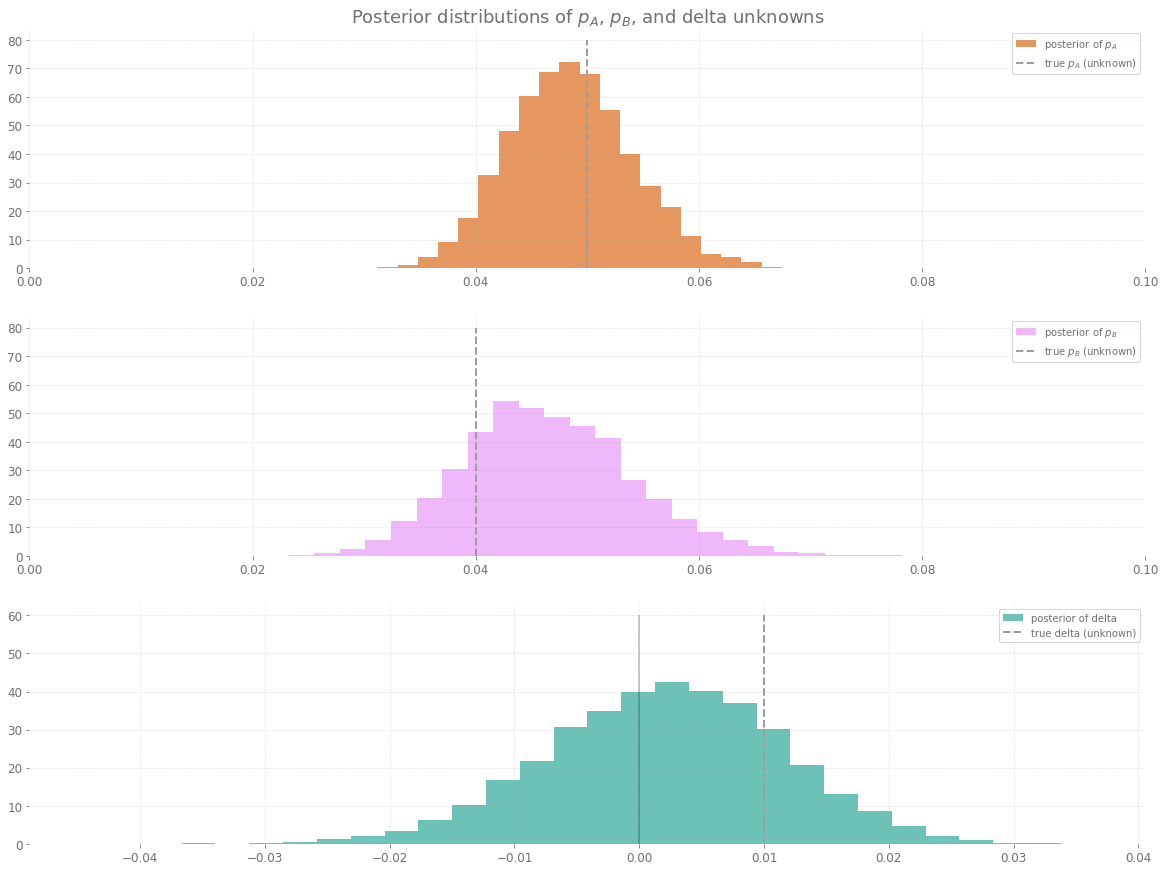

In [17]:
plt.figure(figsize=(20, 15))
ax = plt.subplot(311)

plt.xlim(0, .1)
plt.hist(p_A_samples, histtype='stepfilled', bins=25, alpha=0.85,
         label="posterior of $p_A$", color=burntsienna, density=True)
plt.vlines(true_p_A, 0, 80, linestyle="--", color=silverchalice,
           label="true $p_A$ (unknown)")
plt.legend(loc="upper right")
plt.title("Posterior distributions of $p_A$, $p_B$, and delta unknowns")

ax = plt.subplot(312)

plt.xlim(0, .1)
plt.hist(p_B_samples, histtype='stepfilled', bins=25, alpha=0.85,
         label="posterior of $p_B$", color=mauve, density=True)
plt.vlines(true_p_B, 0, 80, linestyle="--", color=silverchalice,
           label="true $p_B$ (unknown)")
plt.legend(loc="upper right")

ax = plt.subplot(313)
plt.hist(delta_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of delta", color=tradewind, density=True)
plt.vlines(true_p_A - true_p_B, 0, 60, linestyle="--", color=silverchalice,
           label="true delta (unknown)")
plt.vlines(0, 0, 60, color="black", alpha=0.2)
plt.legend(loc="upper right");